<a href="https://colab.research.google.com/github/F-U-Njoku/TwitterTopicModeling/blob/main/TwitterTopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install pyLDAvis to interpret the topics in a topic model
!pip install pyldavis
!pip install GetOldTweets3
!python3 -m spacy download en
!pip install spacy
!sudo apt-get install libmysqlclient-dev
!pip install Pattern

In [ ]:
!wget "https://www.machinelearningplus.com/wp-content/uploads/2018/03/mallet-2.0.8.zip"
!unzip "mallet-2.0.8.zip"
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Import base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Libraries for data retrieval and cleaning
import GetOldTweets3 as got
import string
import re
#Libraries for data pre-processing and topic modelling
import spacy
spacy.load('en')
import gensim
import nltk
nltk.download('punkt')
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
#Libraries for visualization
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#To enable reading in files to colab
# from google.colab import files
# uploaded = files.upload()
# import io
#"fhi360","wharc_nigeria","WHONigeria"


In [ ]:
#functions to change tweets to list of lists each representing a tweet
def atweet2lst(tweet):
  return [tweet.id, tweet.permalink, tweet.username, tweet.to, tweet.text, tweet.date, tweet.retweets, tweet.favorites, tweet.mentions, tweet.hashtags, tweet.geo]

def allhandletweets2lst(tweets):
  container = []
  for tweet in tweets:
      container.append(atweet2lst(tweet))
  return container

In [ ]:
#Official twitter hanldes
handles=["nighealthwatch", "nmanigeria", "Fmohnigeria", "NphcdaNG", "EpiAFRIC", "APINNigeria", "W4HNigeria", "SFHNigeria"]
#Information derived from each tweet
cols = ["ident", "permalink", "username", "to", "text", "date", "retweets", "favorites", "mentions"," hashtags", "geo"]

#save all tweets from a handle as a CSV file
for i in range(len(handles)):    
    tweetCriteria = got.manager.TweetCriteria().setUsername(handles[i]).setSince("2015-01-01").setUntil("2015-12-31")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    pd.DataFrame(allhandletweets2lst(tweets), columns=cols).to_csv( handles[i]+"2015.csv", index=False)   

In [ ]:
#Official twitter hanldes
handles=["nighealthwatch", "nmanigeria", "Fmohnigeria", "NphcdaNG", "EpiAFRIC", "APINNigeria", "W4HNigeria", "SFHNigeria", "NCDCgov"]
#Information derived from each tweet
cols = ["ident", "permalink", "username", "to", "text", "date", "retweets", "favorites", "mentions"," hashtags", "geo"]

#save all tweets from a handle as a CSV file
for i in range(len(handles)):    
    tweetCriteria = got.manager.TweetCriteria().setUsername(handles[i]).setSince("2016-01-01").setUntil("2016-12-31")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    pd.DataFrame(allhandletweets2lst(tweets), columns=cols).to_csv( handles[i]+"2016.csv", index=False)   

In [ ]:
#Official twitter hanldes
handles=["nighealthwatch", "nmanigeria", "Fmohnigeria", "NphcdaNG", "EpiAFRIC", "APINNigeria", "W4HNigeria", "SFHNigeria", "NCDCgov","wharc_nigeria","WHONigeria"]
#Information derived from each tweet
cols = ["ident", "permalink", "username", "to", "text", "date", "retweets", "favorites", "mentions"," hashtags", "geo"]

#save all tweets from a handle as a CSV file
for i in range(len(handles)):    
    tweetCriteria = got.manager.TweetCriteria().setUsername(handles[i]).setSince("2017-01-01").setUntil("2017-12-31")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    pd.DataFrame(allhandletweets2lst(tweets), columns=cols).to_csv( handles[i]+"2017.csv", index=False)   

In [ ]:
#Official twitter hanldes
handles=["nighealthwatch", "nmanigeria", "Fmohnigeria", "NphcdaNG", "EpiAFRIC", "APINNigeria", "W4HNigeria", "SFHNigeria", "NCDCgov","wharc_nigeria","WHONigeria"]
#Information derived from each tweet
cols = ["ident", "permalink", "username", "to", "text", "date", "retweets", "favorites", "mentions"," hashtags", "geo"]

#save all tweets from a handle as a CSV file
for i in range(len(handles)):    
    tweetCriteria = got.manager.TweetCriteria().setUsername(handles[i]).setSince("2018-01-01").setUntil("2018-12-31")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    pd.DataFrame(allhandletweets2lst(tweets), columns=cols).to_csv( handles[i]+"2018.csv", index=False)   

In [ ]:
#Official twitter hanldes
handles=["nighealthwatch", "nmanigeria", "Fmohnigeria", "NphcdaNG", "EpiAFRIC", "APINNigeria", "W4HNigeria", "SFHNigeria", "NCDCgov","wharc_nigeria","WHONigeria"]
#Information derived from each tweet
cols = ["ident", "permalink", "username", "to", "text", "date", "retweets", "favorites", "mentions"," hashtags", "geo"]

#save all tweets from a handle as a CSV file
for i in range(len(handles)):    
    tweetCriteria = got.manager.TweetCriteria().setUsername(handles[i]).setSince("2019-01-01").setUntil("2019-12-31")
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    pd.DataFrame(allhandletweets2lst(tweets), columns=cols).to_csv( handles[i]+"2019.csv", index=False)   

In [ ]:
#Function to remove URL's, stopwords, common words and numbers from tweets.
#And to tokenize and lemmatize
def clean(astring):
  astring.lower()
  astring = re.sub(r'(\d+|https?://\S+|#|@[A-Za-z0-9]+|twitter.com/\S+|pic|nhw\S+|NHW\S+|job)', "", astring)
  temp = ""
  result = []
  astring = gensim.utils.lemmatize(astring)
  for _ in astring:
    temp += ((re.match("(\w+)", _.decode("utf-8")).group(0)) + " ")
  temp = word_tokenize(temp)
  stopPuncWords = stopwords.words('english') + list(string.punctuation)
  stopPuncWords.extend(["health","nigeria","pic","nhwjob","job","vacancy","read","detail"])
  result = [i for i in temp if i not in stopPuncWords]
  return result

#Function to convert series into a list
def intoalist(series):
  datalist = []
  for _ in series:
    datalist += _
  return datalist

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# For 2015

In [ ]:
# Read in CSV files into DataFrames for each twitter handle
nighealthwatch= pd.read_csv("nighealthwatch2015.csv")
nmanigeria= pd.read_csv("nmanigeria2015.csv")
Fmohnigeria= pd.read_csv("Fmohnigeria2015.csv")
Nphcdanigeria= pd.read_csv("NphcdaNG2015.csv")
APINNigeria= pd.read_csv("APINNigeria2015.csv")
EpiAFRIC= pd.read_csv("EpiAFRIC2015.csv")
W4HNigeria= pd.read_csv("W4HNigeria2015.csv")
SFHNigeria= pd.read_csv("SFHNigeria2015.csv")

In [ ]:
#Retrieving only tweet text information for each twitter handle
nighealthwatchtweet= nighealthwatch["text"]
nmanigeriatweet= nmanigeria["text"]
Fmohnigeriatweet= Fmohnigeria["text"]
Nphcdanigeriatweet= Nphcdanigeria["text"]
APINNigeriatweet= APINNigeria["text"]
EpiAFRICtweet= EpiAFRIC["text"]
W4HNigeriatweet= W4HNigeria["text"]
SFHNigeriatweet= SFHNigeria["text"]

In [ ]:
#Pre-process tweets
newnighealthwatch= intoalist(nighealthwatchtweet.apply(clean))
newnmanigeria= intoalist(nmanigeriatweet.apply(clean))
newFmohnigeria= intoalist(Fmohnigeriatweet.apply(clean))
newNphcdanigeria= intoalist(Nphcdanigeriatweet.apply(clean))
newAPINNigeria= intoalist(APINNigeriatweet.apply(clean))
newEpiAFRIC= intoalist(EpiAFRICtweet.apply(clean))
newW4HNigeria= intoalist(W4HNigeriatweet.apply(clean))
newSFHNigeria= intoalist(SFHNigeriatweet.apply(clean))

In [ ]:
data = [newnighealthwatch, newnmanigeria, newFmohnigeria, newNphcdanigeria, newAPINNigeria, newEpiAFRIC,  newW4HNigeria, newSFHNigeria]

#Dictionary encapsulates the mapping between
#normalized words and their integer ids.
dictionary = gensim.corpora.Dictionary(data)
dictionary.save('dictionary.dict')
print( dictionary)

#Convert document (a list of words) into the bag-of-words format
#list of (token_id, token_count) 2-tuples.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data]

#The Matrix Market (MM) exchange formats provide a simple mechanism to facilitate the exchange of matrix data
gensim.corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)



Dictionary(7036 unique tokens: ['aabuja', 'aau', 'abakaliki', 'abalaka', 'abandon']...)


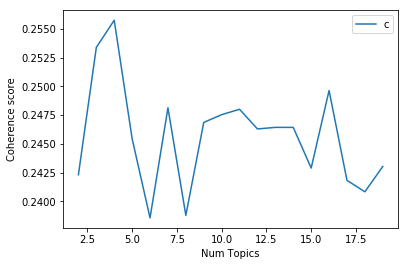

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data, start=2, limit=20, step=1)
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
num_topic = 4
Lda = gensim.models.LdaMulticore#LdaMulticore uses all CPU cores to parallelize and speed up model training
lda= Lda(doc_term_matrix, num_topics=num_topic,id2word = dictionary, passes=20,chunksize=100,random_state=3)

lda.save("lda_topic_model")

for i in lda.print_topics(): 
    for j in i: print(j)

0
0.042*"nghlth" + 0.010*"openmoh" + 0.009*"ebola" + 0.009*"nigerian" + 0.007*"state" + 0.007*"hospital" + 0.006*"medical" + 0.006*"say" + 0.005*"new" + 0.005*"sector"
1
0.001*"utqg" + 0.001*"globaldev" + 0.001*"girlseducation" + 0.001*"ow" + 0.000*"empower" + 0.000*"ly" + 0.000*"outcome" + 0.000*"budget" + 0.000*"strengthen" + 0.000*"nghlth"
2
0.016*"week" + 0.010*"mention" + 0.009*"new" + 0.007*"malaria" + 0.007*"state" + 0.006*"come" + 0.006*"best" + 0.006*"rt" + 0.006*"go" + 0.006*"reach"
3
0.007*"ebola" + 0.007*"thank" + 0.006*"dr" + 0.006*"state" + 0.005*"child" + 0.005*"nma" + 0.004*"measles" + 0.004*"africanunion" + 0.004*"mdcn" + 0.004*"community"


In [ ]:
dic = gensim.corpora.Dictionary.load('dictionary.dict')
corp = gensim.corpora.MmCorpus('corpus.mm')
lda_tp = gensim.models.LdaModel.load("lda_topic_model")

In [ ]:
viz= pyLDAvis.gensim.prepare(lda_tp, corp, dic)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.126276 -0.047520       1        1  89.891472
2      0.026260  0.112671       2        1   6.935068
3     -0.039926 -0.059090       3        1   3.161202
1     -0.112610 -0.006062       4        1   0.012253, topic_info=     Category        Freq          Term        Total  loglift  logprob
1715  Default  502.000000         ebola   502.000000  30.0000  30.0000
5599  Default  410.000000         state   410.000000  29.0000  29.0000
6370  Default  159.000000          week   159.000000  28.0000  28.0000
3901  Default  305.000000           new   305.000000  27.0000  27.0000
1653  Default  220.000000            dr   220.000000  26.0000  26.0000
931   Default  238.000000         child   238.000000  25.0000  25.0000
5881  Default  141.000000         thank   141.000000  24.0000  24.0000
4531  Default  193.000000         polio   193.000000  23.0000  23.0000
2289  Default  173.000000          free   173.000000  22.0000  22.0000
3452  Default  122.000000       malaria   122.000000  21.0000  21.0000
5936  Default  180.000000         today   180.000000  20.0000  20.0000
2423  Default  106.000000            go   106.000000  19.0000  19.0000
6425  Default  194.000000          work   194.000000  18.0000  18.0000
1057  Default   86.000000          come    86.000000  17.0000  17.0000
5743  Default  124.000000       support   124.000000  16.0000  16.0000
169   Default   62.000000  africanunion    62.000000  15.0000  15.0000
6417  Default  151.000000         woman   151.000000  14.0000  14.0000
1088  Default   85.000000     community    85.000000  13.0000  13.0000
5801  Default  119.000000          take   119.000000  12.0000  12.0000
1587  Default  136.000000       disease   136.000000  11.0000  11.0000
5332  Default  168.000000       service   168.000000  10.0000  10.0000
5047  Default  112.000000      response   112.000000   9.0000   9.0000
2670  Default  270.000000           hiv   270.000000   8.0000   8.0000
3445  Default  130.000000          make   130.000000   7.0000   7.0000
2124  Default  104.000000     febhealth   104.000000   6.0000   6.0000
1625  Default  239.000000        doctor   239.000000   5.0000   5.0000
167   Default  118.000000        africa   118.000000   4.0000   4.0000
4506  Default   72.000000        please    72.000000   3.0000   3.0000
4756  Default  151.000000        public   151.000000   2.0000   2.0000
5787  Default   89.000000        system    89.000000   1.0000   1.0000
...       ...         ...           ...          ...      ...      ...
6514   Topic4    0.001005       ancient     1.051262   2.0540  -8.8673
6544   Topic4    0.001005          favs     1.051232   2.0540  -8.8673
1837   Topic4    0.003528       empower     9.346687   1.1253  -7.6110
6521   Topic4    0.001005         brach     1.051252   2.0540  -8.8673
3426   Topic4    0.003134            ly    11.649470   0.7866  -7.7294
4260   Topic4    0.003021       outcome    12.644818   0.6679  -7.7662
749    Topic4    0.002835        budget    14.625235   0.4587  -7.8298
5654   Topic4    0.002729    strengthen    18.152931   0.2045  -7.8679
6078   Topic4    0.001886            uk    37.814224  -0.8989  -8.2375
2611   Topic4    0.001853  healthworker    40.454899  -0.9840  -8.2551
2396   Topic4    0.001739          girl    47.529617  -1.2085  -8.3184
6075   Topic4    0.001673           uhc    56.861782  -1.4264  -8.3570
6345   Topic4    0.001575         watch    78.003883  -1.8030  -8.4175
3914   Topic4    0.002121        nghlth  2214.395996  -4.8516  -8.1201
5787   Topic4    0.001545        system    89.910515  -1.9643  -8.4367
2860   Topic4    0.001527       improve    93.711388  -2.0173  -8.4484
6417   Topic4    0.001561         woman   151.581558  -2.4766  -8.4268
5599   Topic4    0.001304         state   410.278320  -3.6521  -8.6065
3940   Topic4    0.001272      nigerian   478.036652  -3.8300  -8.6316
1715   Topic

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet('mallet-2.0.8/bin/mallet', corpus= corp, num_topics= 4, id2word= dictionary)
# LDA Mallet Model
for i in ldamallet.print_topics(): 
    for j in i: print(j)

0
0.024*"state" + 0.023*"hospital" + 0.021*"medical" + 0.015*"care" + 0.015*"child" + 0.014*"polio" + 0.014*"sign" + 0.013*"free" + 0.012*"year" + 0.011*"event"
1
0.036*"ebola" + 0.019*"healthcare" + 0.015*"dr" + 0.011*"day" + 0.011*"outbreak" + 0.011*"work" + 0.010*"today" + 0.009*"woman" + 0.009*"national" + 0.009*"africa"
2
0.028*"week" + 0.020*"malaria" + 0.014*"state" + 0.010*"support" + 0.010*"mention" + 0.009*"address" + 0.009*"reach" + 0.008*"twitter" + 0.008*"ensure" + 0.007*"present"
3
0.129*"nghlth" + 0.031*"openmoh" + 0.028*"nigerian" + 0.015*"sector" + 0.014*"hiv" + 0.014*"doctor" + 0.011*"person" + 0.010*"lagos" + 0.010*"subscribe" + 0.010*"strike"


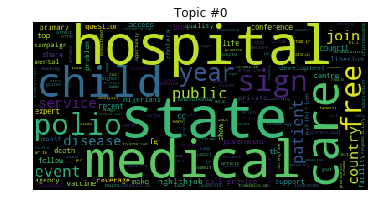

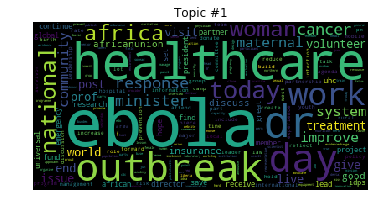

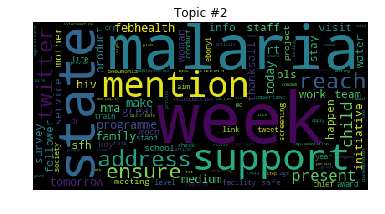

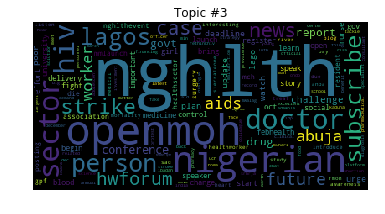

In [ ]:
for t in range(ldamallet.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamallet.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# For 2016

In [ ]:
# Read in CSV files into DataFrames for each twitter handle
nighealthwatch= pd.read_csv("nighealthwatch2016.csv")
nmanigeria= pd.read_csv("nmanigeria2016.csv")
Fmohnigeria= pd.read_csv("Fmohnigeria2016.csv")
Nphcdanigeria= pd.read_csv("NphcdaNG2016.csv")
APINNigeria= pd.read_csv("APINNigeria2016.csv")
EpiAFRIC= pd.read_csv("EpiAFRIC2016.csv")
W4HNigeria= pd.read_csv("W4HNigeria2016.csv")
SFHNigeria= pd.read_csv("SFHNigeria2016.csv")
NCDCgov= pd.read_csv("NCDCgov2016.csv")

In [ ]:
#Retrieving only tweet text information for each twitter handle
nighealthwatchtweet= nighealthwatch["text"]
nmanigeriatweet= nmanigeria["text"]
Fmohnigeriatweet= Fmohnigeria["text"]
Nphcdanigeriatweet= Nphcdanigeria["text"]
APINNigeriatweet= APINNigeria["text"]
EpiAFRICtweet= EpiAFRIC["text"]
W4HNigeriatweet= W4HNigeria["text"]
SFHNigeriatweet= SFHNigeria["text"]
NCDCgovtweet= NCDCgov["text"]

In [ ]:
#Pre-process tweets
newnighealthwatch= intoalist(nighealthwatchtweet.apply(clean))
newnmanigeria= intoalist(nmanigeriatweet.apply(clean))
newFmohnigeria= intoalist(Fmohnigeriatweet.apply(clean))
newNphcdanigeria= intoalist(Nphcdanigeriatweet.apply(clean))
newAPINNigeria= intoalist(APINNigeriatweet.apply(clean))
newEpiAFRIC= intoalist(EpiAFRICtweet.apply(clean))
newW4HNigeria= intoalist(W4HNigeriatweet.apply(clean))
newSFHNigeria= intoalist(SFHNigeriatweet.apply(clean))
newNCDCgov= intoalist(NCDCgovtweet.apply(clean))

In [ ]:
data = [newnighealthwatch, newnmanigeria, newFmohnigeria, newNphcdanigeria, newAPINNigeria, newEpiAFRIC,  newW4HNigeria, newSFHNigeria, newNCDCgov]

#Dictionary encapsulates the mapping between
#normalized words and their integer ids.
dictionary = gensim.corpora.Dictionary(data)
dictionary.save('dictionary.dict')
print( dictionary)

#Convert document (a list of words) into the bag-of-words format
#list of (token_id, token_count) 2-tuples.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data]

#The Matrix Market (MM) exchange formats provide a simple mechanism to facilitate the exchange of matrix data
gensim.corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)



Dictionary(7588 unique tokens: ['aa', 'aaron', 'ab', 'aba', 'abaji']...)


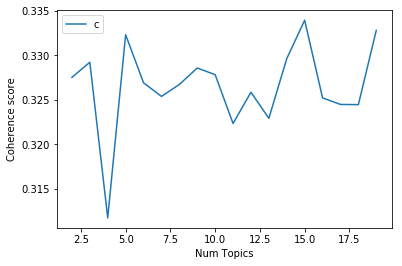

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data, start=2, limit=20, step=1)
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
num_topic = 5
Lda = gensim.models.LdaMulticore#LdaMulticore uses all CPU cores to parallelize and speed up model training
lda= Lda(doc_term_matrix, num_topics=num_topic,id2word = dictionary, passes=20,chunksize=100,random_state=3)

lda.save("lda_topic_model")

for i in lda.print_topics(): 
    for j in i: print(j)

0
0.000*"nghlth" + 0.000*"nigerian" + 0.000*"sector" + 0.000*"deadline" + 0.000*"hospital" + 0.000*"hiv" + 0.000*"state" + 0.000*"healthcare" + 0.000*"conference" + 0.000*"aids"
1
0.033*"nghlth" + 0.012*"nigerian" + 0.010*"sector" + 0.009*"deadline" + 0.008*"hiv" + 0.008*"hospital" + 0.007*"aids" + 0.007*"medical" + 0.005*"conference" + 0.005*"healthcare"
2
0.013*"project" + 0.013*"afritech" + 0.007*"fund" + 0.007*"afritechsummit" + 0.006*"hiv" + 0.005*"tech" + 0.004*"patient" + 0.004*"ceo" + 0.004*"care" + 0.004*"panel"
3
0.009*"state" + 0.009*"lassa" + 0.008*"antibiotic" + 0.007*"fever" + 0.006*"irukaokeke" + 0.005*"dr" + 0.005*"country" + 0.005*"share" + 0.004*"response" + 0.004*"preparedness"
4
0.011*"hmh" + 0.008*"malaria" + 0.006*"state" + 0.005*"woman" + 0.004*"hiv" + 0.004*"need" + 0.004*"thank" + 0.004*"dr" + 0.004*"new" + 0.003*"disease"


In [ ]:
dic = gensim.corpora.Dictionary.load('dictionary.dict')
corp = gensim.corpora.MmCorpus('corpus.mm')
lda_tp = gensim.models.LdaModel.load("lda_topic_model")

In [ ]:
viz= pyLDAvis.gensim.prepare(lda_tp, corp, dic)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.141859  0.054441       1        1  87.073685
4     -0.073544 -0.035008       2        1   8.744727
3      0.007451 -0.096265       3        1   2.729396
2      0.076512  0.077064       4        1   1.450291
0      0.131441 -0.000233       5        1   0.001903, topic_info=     Category         Freq        Term        Total  loglift  logprob
5629  Default   504.000000       state   504.000000  30.0000  30.0000
2645  Default   693.000000         hiv   693.000000  29.0000  29.0000
1685  Default   345.000000          dr   345.000000  28.0000  28.0000
2315  Default   169.000000        fund   169.000000  27.0000  27.0000
210   Default   563.000000        aids   563.000000  26.0000  26.0000
3977  Default  1022.000000    nigerian  1022.000000  25.0000  25.0000
4423  Default   257.000000     patient   257.000000  24.0000  24.0000
4760  Default   110.000000     project   110.000000  23.0000  23.0000
3474  Default   344.000000     malaria   344.000000  22.0000  22.0000
832   Default   243.000000        care   243.000000  21.0000  21.0000
3129  Default   323.000000        join   323.000000  20.0000  20.0000
5378  Default   187.000000       share   187.000000  19.0000  19.0000
5967  Default   268.000000       today   268.000000  18.0000  18.0000
1600  Default   292.000000     disease   292.000000  17.0000  17.0000
3858  Default   371.000000    national   371.000000  16.0000  16.0000
1280  Default   220.000000     country   220.000000  15.0000  15.0000
4473  Default   367.000000      person   367.000000  14.0000  14.0000
5864  Default   108.000000        tech   108.000000  13.0000  13.0000
3886  Default   363.000000        need   363.000000  12.0000  12.0000
171   Default   201.000000      africa   201.000000  11.0000  11.0000
3939  Default  2709.000000      nghlth  2709.000000  10.0000  10.0000
5772  Default   195.000000     support   195.000000   9.0000   9.0000
6489  Default   186.000000        work   186.000000   8.0000   8.0000
2560  Default   459.000000  healthcare   459.000000   7.0000   7.0000
5090  Default   152.000000    response   152.000000   6.0000   6.0000
840   Default   194.000000        case   194.000000   5.0000   5.0000
4810  Default   229.000000      public   229.000000   4.0000   4.0000
5912  Default   200.000000       thank   200.000000   3.0000   3.0000
6540  Default   254.000000        year   254.000000   2.0000   2.0000
5348  Default   338.000000     service   338.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
3939   Topic5     0.000264      nghlth  2709.550293  -5.2736  -8.8256
3977   Topic5     0.000258    nigerian  1022.212585  -4.3237  -8.8506
5304   Topic5     0.000252      sector   812.721497  -4.1175  -8.8737
1384   Topic5     0.000248    deadline   718.451477  -4.0115  -8.8910
2690   Topic5     0.000247    hospital   640.381897  -3.8984  -8.8929
2645   Topic5     0.000246         hiv   693.367065  -3.9815  -8.8965
5629   Topic5     0.000246       state   504.660767  -3.6652  -8.8979
2560   Topic5     0.000246  healthcare   459.269379  -3.5711  -8.8980
1136   Topic5     0.000245  conference   452.021118  -3.5565  -8.8993
210    Topic5     0.000245        aids   563.018066  -3.7795  -8.9027
3928   Topic5     0.000244        news   364.960541  -3.3468  -8.9036
5348   Topic5     0.000244     service   338.096985  -3.2724  -8.9056
1645   Topic5     0.000244      doctor   406.488007  -3.4582  -8.9072
1685   Topic5     0.000244          dr   345.311432  -3.2951  -8.9073
4423   Topic5     0.000243     patient   257.385895  -3.0023  -8.9083
3586   Topic5     0.000243     medical   564.114502  -3.7874  -8.9087
38     Topic5     0.000243       abuja   386.403961  -3.4097  -8.9093
4241   Topic5     0.000243     openmoh   417.836670  -3.4888  -8.9103
4473   Topic5     0.000243      person   367.324799  -3.3603  -8.9106
943    To

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet('mallet-2.0.8/bin/mallet', corpus= corp, num_topics= 5, id2word= dictionary)
# LDA Mallet Model
for i in ldamallet.print_topics(): 
    for j in i: print(j)

0
0.018*"national" + 0.015*"join" + 0.014*"lassafever" + 0.013*"nigerian" + 0.013*"visit" + 0.011*"make" + 0.011*"public" + 0.010*"live" + 0.010*"disease" + 0.010*"polio"
1
0.015*"hmh" + 0.015*"state" + 0.012*"lassa" + 0.012*"fever" + 0.011*"disease" + 0.009*"virus" + 0.009*"antibiotic" + 0.008*"dr" + 0.008*"control" + 0.008*"drug"
2
0.093*"nghlth" + 0.028*"sector" + 0.026*"nigerian" + 0.025*"deadline" + 0.022*"hospital" + 0.019*"medical" + 0.018*"aids" + 0.016*"conference" + 0.014*"openmoh" + 0.013*"child"
3
0.038*"hiv" + 0.025*"healthcare" + 0.019*"person" + 0.014*"strike" + 0.013*"care" + 0.013*"patient" + 0.013*"year" + 0.012*"subscribe" + 0.012*"worker" + 0.012*"dr"
4
0.028*"malaria" + 0.012*"facility" + 0.010*"woman" + 0.010*"address" + 0.010*"event" + 0.010*"treatment" + 0.009*"state" + 0.009*"private" + 0.009*"great" + 0.009*"plan"


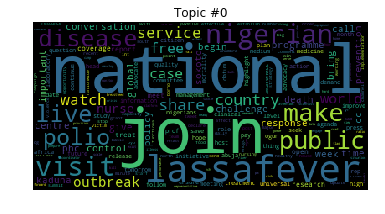

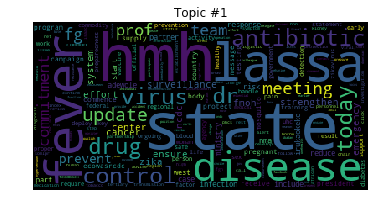

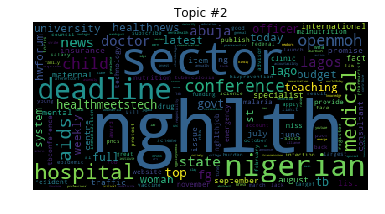

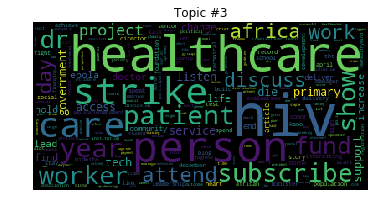

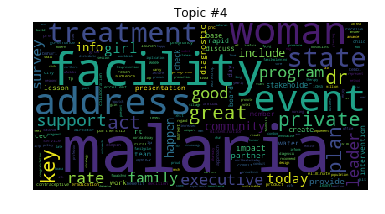

In [ ]:
for t in range(ldamallet.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamallet.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# For 2017

In [ ]:
# Read in CSV files into DataFrames for each twitter handle
nighealthwatch= pd.read_csv("nighealthwatch2017.csv")
nmanigeria= pd.read_csv("nmanigeria2017.csv")
Fmohnigeria= pd.read_csv("Fmohnigeria2017.csv")
Nphcdanigeria= pd.read_csv("NphcdaNG2017.csv")
APINNigeria= pd.read_csv("APINNigeria2017.csv")
EpiAFRIC= pd.read_csv("EpiAFRIC2017.csv")
W4HNigeria= pd.read_csv("W4HNigeria2017.csv")
SFHNigeria= pd.read_csv("SFHNigeria2017.csv")
NCDCgov= pd.read_csv("NCDCgov2017.csv")
wharc_nigeria= pd.read_csv("wharc_nigeria2017.csv")
WHONigeria= pd.read_csv("WHONigeria2017.csv")

In [ ]:
#Retrieving only tweet text information for each twitter handle
nighealthwatchtweet= nighealthwatch["text"]
nmanigeriatweet= nmanigeria["text"]
Fmohnigeriatweet= Fmohnigeria["text"]
Nphcdanigeriatweet= Nphcdanigeria["text"]
APINNigeriatweet= APINNigeria["text"]
EpiAFRICtweet= EpiAFRIC["text"]
W4HNigeriatweet= W4HNigeria["text"]
SFHNigeriatweet= SFHNigeria["text"]
NCDCgovtweet= NCDCgov["text"]
wharc_nigeriatweet= wharc_nigeria["text"]
WHONigeriatweet= WHONigeria["text"]

In [ ]:
#Pre-process tweets
newnighealthwatch= intoalist(nighealthwatchtweet.apply(clean))
newnmanigeria= intoalist(nmanigeriatweet.apply(clean))
newFmohnigeria= intoalist(Fmohnigeriatweet.apply(clean))
newNphcdanigeria= intoalist(Nphcdanigeriatweet.apply(clean))
newAPINNigeria= intoalist(APINNigeriatweet.apply(clean))
newEpiAFRIC= intoalist(EpiAFRICtweet.apply(clean))
newW4HNigeria= intoalist(W4HNigeriatweet.apply(clean))
newSFHNigeria= intoalist(SFHNigeriatweet.apply(clean))
newNCDCgov= intoalist(NCDCgovtweet.apply(clean))
newwharc_nigeria= intoalist(wharc_nigeriatweet.apply(clean))
newWHONigeria= intoalist(WHONigeriatweet.apply(clean))

In [ ]:
data = [newnighealthwatch, newnmanigeria, newFmohnigeria, newNphcdanigeria, newAPINNigeria, newEpiAFRIC,  newW4HNigeria, newSFHNigeria, newNCDCgov,newwharc_nigeria,newWHONigeria]

#Dictionary encapsulates the mapping between
#normalized words and their integer ids.
dictionary = gensim.corpora.Dictionary(data)
dictionary.save('dictionary.dict')
print( dictionary)

#Convert document (a list of words) into the bag-of-words format
#list of (token_id, token_count) 2-tuples.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data]

#The Matrix Market (MM) exchange formats provide a simple mechanism to facilitate the exchange of matrix data
gensim.corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)



Dictionary(8740 unique tokens: ['aa', 'ab', 'aba', 'ababa', 'abacha']...)


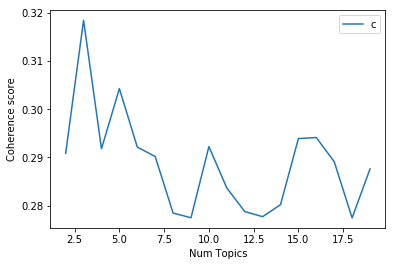

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data, start=2, limit=20, step=1)
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
num_topic = 3
Lda = gensim.models.LdaMulticore#LdaMulticore uses all CPU cores to parallelize and speed up model training
lda= Lda(doc_term_matrix, num_topics=num_topic,id2word = dictionary, passes=20,chunksize=100,random_state=3)

lda.save("lda_topic_model")

for i in lda.print_topics(): 
    for j in i: print(j)

0
0.009*"healthmeetstech" + 0.006*"woman" + 0.006*"hackathon" + 0.006*"state" + 0.005*"thank" + 0.004*"support" + 0.004*"service" + 0.004*"today" + 0.004*"team" + 0.004*"project"
1
0.014*"nghlth" + 0.010*"nigerian" + 0.009*"healthallnaija" + 0.009*"deadline" + 0.008*"state" + 0.008*"healthnews" + 0.006*"child" + 0.006*"sector" + 0.006*"healthcare" + 0.005*"service"
2
0.015*"state" + 0.008*"outbreak" + 0.008*"dr" + 0.007*"support" + 0.007*"disease" + 0.007*"work" + 0.006*"national" + 0.006*"team" + 0.006*"response" + 0.006*"meeting"


In [ ]:
dic = gensim.corpora.Dictionary.load('dictionary.dict')
corp = gensim.corpora.MmCorpus('corpus.mm')
lda_tp = gensim.models.LdaModel.load("lda_topic_model")

In [ ]:
viz= pyLDAvis.gensim.prepare(lda_tp, corp, dic)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.017165 -0.095704       1        1  61.879307
2     -0.104226  0.034970       2        1  30.137274
0      0.087061  0.060734       3        1   7.983413, topic_info=     Category         Freq             Term        Total  loglift  logprob
3246  Default  1022.000000           nghlth  1022.000000  30.0000  30.0000
2138  Default   169.000000  healthmeetstech   169.000000  29.0000  29.0000
1136  Default   657.000000         deadline   657.000000  28.0000  28.0000
5309  Default   248.000000            woman   248.000000  27.0000  27.0000
2128  Default   669.000000   healthallnaija   669.000000  26.0000  26.0000
4626  Default  1137.000000            state  1137.000000  25.0000  25.0000
2143  Default   573.000000       healthnews   573.000000  24.0000  24.0000
4740  Default   418.000000          support   418.000000  23.0000  23.0000
3188  Default   204.000000             ncdc   204.000000  22.0000  22.0000
4812  Default   341.000000             team   341.000000  21.0000  21.0000
4842  Default   237.000000            thank   237.000000  20.0000  20.0000
2069  Default    95.000000        hackathon    95.000000  19.0000  19.0000
5318  Default   356.000000             work   356.000000  18.0000  18.0000
3499  Default   432.000000         outbreak   432.000000  17.0000  17.0000
3316  Default   163.000000           nphcda   163.000000  16.0000  16.0000
1450  Default   159.000000               ed   159.000000  15.0000  15.0000
4173  Default   298.000000         response   298.000000  14.0000  14.0000
303   Default   198.000000   apininitiative   198.000000  13.0000  13.0000
720   Default   235.000000              ceo   235.000000  12.0000  12.0000
2973  Default   353.000000          meeting   353.000000  11.0000  11.0000
1386  Default   541.000000               dr   541.000000  10.0000  10.0000
4406  Default   456.000000          service   456.000000   9.0000   9.0000
2321  Default   201.000000     immunization   201.000000   8.0000   8.0000
5261  Default   307.000000             week   307.000000   7.0000   7.0000
3886  Default   179.000000          project   179.000000   6.0000   6.0000
4894  Default   412.000000            today   412.000000   5.0000   5.0000
2954  Default   166.000000          measles   166.000000   4.0000   4.0000
4752  Default   200.000000     surveillance   200.000000   3.0000   3.0000
5135  Default   179.000000      vaccination   179.000000   2.0000   2.0000
1130  Default   310.000000              day   310.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
959    Topic3    10.834344   congratulation    19.066687   1.9626  -6.7369
5382   Topic3    14.473791            youth    31.421032   1.7527  -6.4473
1988   Topic3    13.860156             girl    29.840698   1.7609  -6.4906
4842   Topic3    44.804623            thank   237.899048   0.8583  -5.3173
4815   Topic3    24.304167             tech    83.604691   1.2924  -5.9290
4689   Topic3    16.879416          student    47.189228   1.4997  -6.2935
1439   Topic3    25.825014            ebola   111.716110   1.0632  -5.8683
3886   Topic3    32.564159          project   179.422119   0.8213  -5.6364
4519   Topic3    24.226435           social   107.330437   1.0393  -5.9322
4011   Topic3    22.166599            reach    91.748306   1.1073  -6.0210
2164   Topic3    24.322159             help   118.280914   0.9461  -5.9282
2325   Topic3    20.604910           impact    84.031029   1.1221  -6.0941
4740   Topic3    38.742020          support   418.128723   0.1489  -5.4627
3241   Topic3    22.935183               ng   116.538124   0.9023  -5.9869
4626   Topic3    51.137314            state  1137.797974  -0.5745  -5.1851
4406   Topic3    36.301796          service   456.964203  -0.0049  -5.5277
4812   Topic3    32.590443             team   341.093750   0.1797  -5.6356
2970   Topic

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet('mallet-2.0.8/bin/mallet', corpus= corp, num_topics= 3, id2word= dictionary)
# LDA Mallet Model
for i in ldamallet.print_topics(): 
    for j in i: print(j)

0
0.015*"outbreak" + 0.014*"state" + 0.012*"meningitis" + 0.011*"disease" + 0.011*"work" + 0.010*"response" + 0.010*"team" + 0.010*"support" + 0.009*"case" + 0.009*"report"
1
0.021*"nghlth" + 0.015*"nigerian" + 0.014*"healthallnaija" + 0.014*"deadline" + 0.012*"healthnews" + 0.010*"sector" + 0.009*"child" + 0.009*"healthcare" + 0.008*"state" + 0.008*"hospital"
2
0.015*"state" + 0.010*"dr" + 0.010*"child" + 0.008*"immunization" + 0.008*"apininitiative" + 0.008*"ceo" + 0.007*"campaign" + 0.007*"nphcda" + 0.006*"ed" + 0.006*"day"


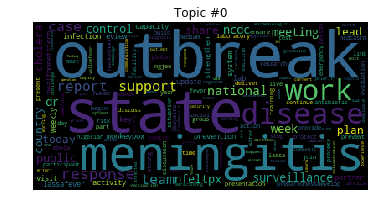

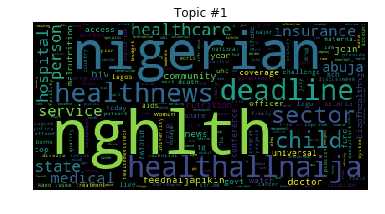

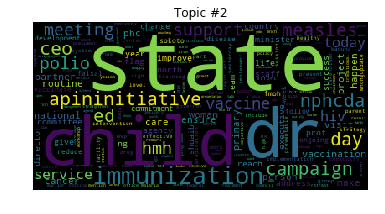

In [ ]:
for t in range(ldamallet.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamallet.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# For 2018

In [ ]:
# Read in CSV files into DataFrames for each twitter handle
nighealthwatch= pd.read_csv("nighealthwatch2018.csv")
nmanigeria= pd.read_csv("nmanigeria2018.csv")
Fmohnigeria= pd.read_csv("Fmohnigeria2018.csv")
Nphcdanigeria= pd.read_csv("NphcdaNG2018.csv")
APINNigeria= pd.read_csv("APINNigeria2018.csv")
EpiAFRIC= pd.read_csv("EpiAFRIC2018.csv")
W4HNigeria= pd.read_csv("W4HNigeria2018.csv")
SFHNigeria= pd.read_csv("SFHNigeria2018.csv")
NCDCgov= pd.read_csv("NCDCgov2018.csv")
wharc_nigeria= pd.read_csv("wharc_nigeria2018.csv")
WHONigeria= pd.read_csv("WHONigeria2018.csv")

In [ ]:
NCDCgov[NCDCgov.text.isnull()]
NCDCgov.drop(1111, inplace=True)

In [ ]:
#Retrieving only tweet text information for each twitter handle
nighealthwatchtweet= nighealthwatch["text"]
nmanigeriatweet= nmanigeria["text"]
Fmohnigeriatweet= Fmohnigeria["text"]
Nphcdanigeriatweet= Nphcdanigeria["text"]
APINNigeriatweet= APINNigeria["text"]
EpiAFRICtweet= EpiAFRIC["text"]
W4HNigeriatweet= W4HNigeria["text"]
SFHNigeriatweet= SFHNigeria["text"]
NCDCgovtweet= NCDCgov["text"]
wharc_nigeriatweet= wharc_nigeria["text"]
WHONigeriatweet= WHONigeria["text"]

In [ ]:
#Pre-process tweets
newnighealthwatch= intoalist(nighealthwatchtweet.apply(clean))
newnmanigeria= intoalist(nmanigeriatweet.apply(clean))
newFmohnigeria= intoalist(Fmohnigeriatweet.apply(clean))
newNphcdanigeria= intoalist(Nphcdanigeriatweet.apply(clean))
newAPINNigeria= intoalist(APINNigeriatweet.apply(clean))
newEpiAFRIC= intoalist(EpiAFRICtweet.apply(clean))
newW4HNigeria= intoalist(W4HNigeriatweet.apply(clean))
newSFHNigeria= intoalist(SFHNigeriatweet.apply(clean))
newNCDCgov= intoalist(NCDCgovtweet.apply(clean))
newwharc_nigeria= intoalist(wharc_nigeriatweet.apply(clean))
newWHONigeria= intoalist(WHONigeriatweet.apply(clean))

In [ ]:
data = [newnighealthwatch, newnmanigeria, newFmohnigeria, newNphcdanigeria, newAPINNigeria, newEpiAFRIC,  newW4HNigeria, newSFHNigeria, newNCDCgov,newwharc_nigeria,newWHONigeria]

#Dictionary encapsulates the mapping between
#normalized words and their integer ids.
dictionary = gensim.corpora.Dictionary(data)
dictionary.save('dictionary.dict')
print( dictionary)

#Convert document (a list of words) into the bag-of-words format
#list of (token_id, token_count) 2-tuples.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data]

#The Matrix Market (MM) exchange formats provide a simple mechanism to facilitate the exchange of matrix data
gensim.corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)



Dictionary(9979 unique tokens: ['aaco', 'aba', 'abajue', 'abandon', 'abanida']...)


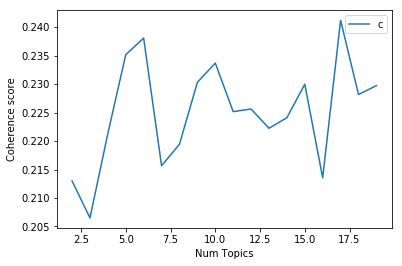

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data, start=2, limit=20, step=1)
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
num_topic = 5
Lda = gensim.models.LdaMulticore#LdaMulticore uses all CPU cores to parallelize and speed up model training
lda= Lda(doc_term_matrix, num_topics=num_topic,id2word = dictionary, passes=20,chunksize=100,random_state=3)

lda.save("lda_topic_model")

for i in lda.print_topics(): 
    for j in i: print(j)

0
0.007*"state" + 0.006*"healthforall" + 0.005*"person" + 0.005*"country" + 0.005*"disease" + 0.005*"immunization" + 0.004*"support" + 0.004*"outbreak" + 0.004*"life" + 0.004*"community"
1
0.014*"apin" + 0.011*"apininitiative" + 0.007*"award" + 0.007*"service" + 0.007*"family" + 0.007*"long" + 0.006*"hiv" + 0.006*"congratulation" + 0.005*"worldaidsday" + 0.004*"public"
2
0.012*"state" + 0.008*"deadline" + 0.006*"dr" + 0.006*"nigerian" + 0.006*"child" + 0.005*"plan" + 0.005*"conference" + 0.004*"disease" + 0.004*"need" + 0.004*"service"
3
0.012*"week" + 0.011*"retweet" + 0.011*"reach" + 0.010*"woman" + 0.008*"mention" + 0.008*"thank" + 0.007*"state" + 0.007*"care" + 0.007*"see" + 0.006*"biggest"
4
0.015*"lassafever" + 0.014*"disease" + 0.012*"ncdc" + 0.010*"outbreak" + 0.010*"state" + 0.008*"response" + 0.007*"support" + 0.007*"work" + 0.006*"team" + 0.006*"national"


In [ ]:
dic = gensim.corpora.Dictionary.load('dictionary.dict')
corp = gensim.corpora.MmCorpus('corpus.mm')
lda_tp = gensim.models.LdaModel.load("lda_topic_model")

In [ ]:
viz= pyLDAvis.gensim.prepare(lda_tp, corp, dic)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.022812  0.036193       1        1  31.795031
0      0.112628  0.060862       2        1  29.252846
4      0.053351 -0.146972       3        1  23.185045
1     -0.007584  0.053024       4        1  14.092474
3     -0.181208 -0.003106       5        1   1.674609, topic_info=     Category         Freq             Term        Total  loglift  logprob
2835  Default   500.000000             ncdc   500.000000  30.0000  30.0000
1856  Default   204.000000        hackathon   204.000000  29.0000  29.0000
5997  Default   267.000000           nphcda   267.000000  28.0000  28.0000
2410  Default   660.000000       lassafever   660.000000  27.0000  27.0000
2080  Default   389.000000     immunization   389.000000  26.0000  26.0000
3907  Default   370.000000          service   370.000000  25.0000  25.0000
4680  Default   275.000000            woman   275.000000  24.0000  24.0000
1913  Default   284.000000   healthallnaija   284.000000  23.0000  23.0000
3506  Default   369.000000           public   369.000000  22.0000  22.0000
1962  Default   143.000000              hiv   143.000000  21.0000  21.0000
2650  Default   390.000000          meeting   390.000000  20.0000  20.0000
1552  Default   126.000000           family   126.000000  19.0000  19.0000
683   Default   482.000000            child   482.000000  18.0000  18.0000
690   Default   161.000000             chip   161.000000  17.0000  17.0000
1220  Default   636.000000               dr   636.000000  16.0000  16.0000
4691  Default   185.000000            world   185.000000  15.0000  15.0000
1007  Default   274.000000         deadline   274.000000  14.0000  14.0000
2372  Default   204.000000             know   204.000000  13.0000  13.0000
3720  Default   134.000000          retweet   134.000000  12.0000  12.0000
4240  Default   117.000000             tech   117.000000  11.0000  11.0000
4076  Default  1438.000000            state  1438.000000  10.0000  10.0000
3705  Default   397.000000         response   397.000000   9.0000   9.0000
1003  Default   379.000000              day   379.000000   8.0000   8.0000
1166  Default   820.000000          disease   820.000000   7.0000   7.0000
3113  Default   575.000000         outbreak   575.000000   6.0000   6.0000
3238  Default   375.000000           person   375.000000   5.0000   5.0000
4587  Default   168.000000  votehealthnaija   168.000000   4.0000   4.0000
3561  Default   194.000000            reach   194.000000   3.0000   3.0000
4733  Default   169.000000      yellowfever   169.000000   2.0000   2.0000
4636  Default   472.000000             week   472.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
492    Topic5     9.068056            blood    25.815229   3.0434  -5.3806
4570   Topic5     8.541810         violence    27.197517   2.9314  -5.4404
2521   Topic5    13.813542             long    53.224174   2.7407  -4.9597
4493   Topic5     3.795621           unveil     9.312767   3.1921  -6.2515
526    Topic5     3.268059            brand     7.685994   3.2344  -6.4012
844    Topic5    11.704740   congratulation    44.182522   2.7613  -5.1254
6398   Topic5     2.740921           tablet     6.310829   3.2556  -6.5771
4476   Topic5     2.216104            unite     4.876577   3.3009  -6.7896
2909   Topic5     5.904915            night    21.744873   2.7860  -5.8096
6640   Topic5     2.740881   knowyourstatus     7.105032   3.1371  -6.5771
5697   Topic5     1.686711         identity     3.377020   3.3954  -7.0626
145    Topic5     9.071212             aids    50.691521   2.3689  -5.3803
1552   Topic5    13.822020           family   126.100708   1.8788  -4.9591
1962   Topic5    12.243196              hiv   143.288391   1.6297  -5.0804
3907   Topic5    13.835904          service   370.384338   0.8023  -4.9581
2167   Topic5     5.907972       initiative    54.5333

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet('mallet-2.0.8/bin/mallet', corpus= corp, num_topics= 5, id2word= dictionary)
# LDA Mallet Model
for i in ldamallet.print_topics(): 
    for j in i: print(j)

0
0.019*"hackathon" + 0.015*"woman" + 0.015*"week" + 0.014*"reach" + 0.013*"disease" + 0.013*"retweet" + 0.011*"tech" + 0.010*"twitter" + 0.010*"infectious" + 0.009*"team"
1
0.031*"state" + 0.019*"immunization" + 0.016*"meeting" + 0.014*"team" + 0.013*"nphcda" + 0.013*"child" + 0.010*"dr" + 0.010*"phc" + 0.008*"chip" + 0.008*"today"
2
0.014*"dr" + 0.013*"person" + 0.012*"care" + 0.011*"state" + 0.009*"community" + 0.008*"hospital" + 0.007*"government" + 0.006*"ensure" + 0.006*"country" + 0.006*"today"
3
0.021*"lassafever" + 0.019*"disease" + 0.018*"outbreak" + 0.016*"ncdc" + 0.014*"response" + 0.013*"state" + 0.010*"support" + 0.010*"national" + 0.010*"week" + 0.009*"work"
4
0.023*"deadline" + 0.013*"nigerian" + 0.012*"conference" + 0.011*"sector" + 0.011*"family" + 0.010*"plan" + 0.010*"borno" + 0.010*"healthallnaija" + 0.009*"nghlth" + 0.008*"naijamenfp"


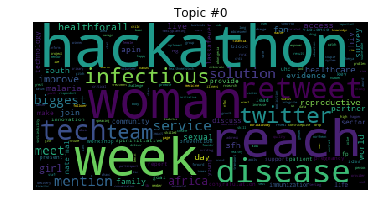

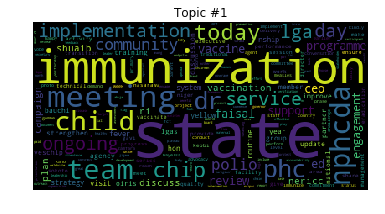

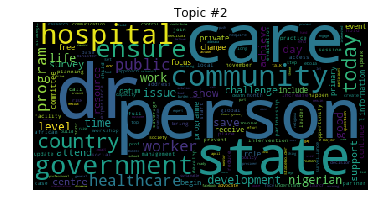

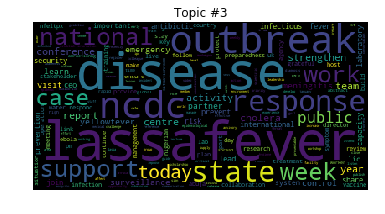

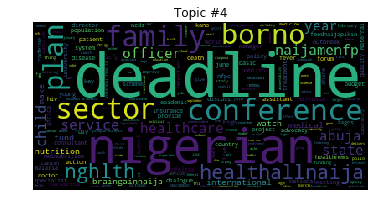

In [ ]:
for t in range(ldamallet.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamallet.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

# For 2019

In [ ]:
#NCDCgov.drop(70, inplace=True)
# Read in CSV files into DataFrames for each twitter handle
nighealthwatch= pd.read_csv("nighealthwatch2019.csv")
nmanigeria= pd.read_csv("nmanigeria2019.csv")
Fmohnigeria= pd.read_csv("Fmohnigeria2019.csv")
Nphcdanigeria= pd.read_csv("NphcdaNG2019.csv")
APINNigeria= pd.read_csv("APINNigeria2019.csv")
EpiAFRIC= pd.read_csv("EpiAFRIC2019.csv")
W4HNigeria= pd.read_csv("W4HNigeria2019.csv")
SFHNigeria= pd.read_csv("SFHNigeria2019.csv")
NCDCgov= pd.read_csv("NCDCgov2019.csv")
wharc_nigeria= pd.read_csv("wharc_nigeria2019.csv")
WHONigeria= pd.read_csv("WHONigeria2019.csv")

In [ ]:
#Retrieving only tweet text information for each twitter handle
nighealthwatchtweet= nighealthwatch["text"]
nmanigeriatweet= nmanigeria["text"]
Fmohnigeriatweet= Fmohnigeria["text"]
Nphcdanigeriatweet= Nphcdanigeria["text"]
APINNigeriatweet= APINNigeria["text"]
EpiAFRICtweet= EpiAFRIC["text"]
W4HNigeriatweet= W4HNigeria["text"]
SFHNigeriatweet= SFHNigeria["text"]
NCDCgovtweet= NCDCgov["text"]
wharc_nigeriatweet= wharc_nigeria["text"]
WHONigeriatweet= WHONigeria["text"]

In [ ]:
#Pre-process tweets
newnighealthwatch= intoalist(nighealthwatchtweet.apply(clean))
newnmanigeria= intoalist(nmanigeriatweet.apply(clean))
newFmohnigeria= intoalist(Fmohnigeriatweet.apply(clean))
newNphcdanigeria= intoalist(Nphcdanigeriatweet.apply(clean))
newAPINNigeria= intoalist(APINNigeriatweet.apply(clean))
newEpiAFRIC= intoalist(EpiAFRICtweet.apply(clean))
newW4HNigeria= intoalist(W4HNigeriatweet.apply(clean))
newSFHNigeria= intoalist(SFHNigeriatweet.apply(clean))
newNCDCgov= intoalist(NCDCgovtweet.apply(clean))
newwharc_nigeria= intoalist(wharc_nigeriatweet.apply(clean))
newWHONigeria= intoalist(WHONigeriatweet.apply(clean))

In [ ]:
data = [newnighealthwatch, newnmanigeria, newFmohnigeria, newNphcdanigeria, newAPINNigeria, newEpiAFRIC,  newW4HNigeria, newSFHNigeria, newNCDCgov,newwharc_nigeria,newWHONigeria]

#Dictionary encapsulates the mapping between
#normalized words and their integer ids.
dictionary = gensim.corpora.Dictionary(data)
dictionary.save('dictionary.dict')
print( dictionary)

#Convert document (a list of words) into the bag-of-words format
#list of (token_id, token_count) 2-tuples.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data]

#The Matrix Market (MM) exchange formats provide a simple mechanism to facilitate the exchange of matrix data
gensim.corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)



Dictionary(7179 unique tokens: ['abajue', 'abakaliki', 'abandon', 'abandoned', 'abaye']...)


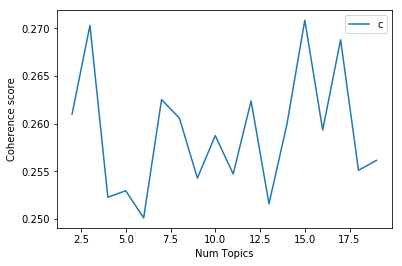

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data, start=2, limit=20, step=1)
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
num_topic = 3
Lda = gensim.models.LdaMulticore#LdaMulticore uses all CPU cores to parallelize and speed up model training
lda= Lda(doc_term_matrix, num_topics=num_topic,id2word = dictionary, passes=20,chunksize=100,random_state=3)

lda.save("lda_topic_model")

for i in lda.print_topics(): 
    for j in i: print(j)

0
0.023*"lassafever" + 0.015*"ncdc" + 0.013*"disease" + 0.009*"outbreak" + 0.009*"state" + 0.009*"response" + 0.007*"national" + 0.007*"lic" + 0.006*"team" + 0.006*"case"
1
0.011*"week" + 0.010*"state" + 0.009*"mention" + 0.009*"reach" + 0.008*"retweet" + 0.007*"see" + 0.006*"twitter" + 0.006*"thank" + 0.005*"biggest" + 0.005*"fan"
2
0.011*"state" + 0.006*"community" + 0.006*"healthallnaija" + 0.006*"dr" + 0.006*"child" + 0.005*"nigerian" + 0.005*"deadline" + 0.005*"need" + 0.005*"healthcare" + 0.004*"care"


In [ ]:
dic = gensim.corpora.Dictionary.load('dictionary.dict')
corp = gensim.corpora.MmCorpus('corpus.mm')
lda_tp = gensim.models.LdaModel.load("lda_topic_model")

In [ ]:
viz= pyLDAvis.gensim.prepare(lda_tp, corp, dic)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.003346 -0.091101       1        1  51.680576
0     -0.110790  0.047583       2        1  44.209991
2      0.114136  0.043517       3        1   4.109433, topic_info=     Category        Freq             Term       Total  loglift  logprob
2410  Default  758.000000       lassafever  758.000000  30.0000  30.0000
4076  Default  813.000000            state  813.000000  29.0000  29.0000
4636  Default  228.000000             week  228.000000  28.0000  28.0000
2835  Default  412.000000             ncdc  412.000000  27.0000  27.0000
3873  Default  162.000000              see  162.000000  26.0000  26.0000
3561  Default   82.000000            reach   82.000000  25.0000  25.0000
4266  Default  123.000000            thank  123.000000  24.0000  24.0000
592   Default  251.000000             care  251.000000  23.0000  23.0000
1913  Default  298.000000   healthallnaija  298.000000  22.0000  22.0000
1220  Default  417.000000               dr  417.000000  21.0000  21.0000
4680  Default  200.000000            woman  200.000000  20.0000  20.0000
4312  Default  345.000000            today  345.000000  19.0000  19.0000
2869  Default  129.000000              new  129.000000  18.0000  18.0000
1715  Default  126.000000             fund  126.000000  17.0000  17.0000
1007  Default  250.000000         deadline  250.000000  16.0000  16.0000
3705  Default  298.000000         response  298.000000  15.0000  15.0000
1916  Default  312.000000       healthcare  312.000000  14.0000  14.0000
3907  Default  190.000000          service  190.000000  13.0000  13.0000
2658  Default  174.000000       meningitis  174.000000  12.0000  12.0000
462   Default   55.000000            bhcpf   55.000000  11.0000  11.0000
1962  Default  104.000000              hiv  104.000000  10.0000  10.0000
2900  Default   65.000000            niger   65.000000   9.0000   9.0000
3869  Default  207.000000           sector  207.000000   8.0000   8.0000
4406  Default   37.000000          twitter   37.000000   7.0000   7.0000
3720  Default   34.000000          retweet   34.000000   6.0000   6.0000
2662  Default   32.000000          mention   32.000000   5.0000   5.0000
4587  Default  166.000000  votehealthnaija  166.000000   4.0000   4.0000
190   Default  162.000000             also  162.000000   3.0000   3.0000
4372  Default   87.000000        treatment   87.000000   2.0000   2.0000
469   Default   38.000000          biggest   38.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
2954   Topic3    2.524888       nrc_azodoh    4.104439   2.7060  -7.1689
2507   Topic3    2.523652             llin    4.105212   2.7053  -7.1694
2863   Topic3    4.270307              net    7.740438   2.5971  -6.6434
469    Topic3   15.342209          biggest   38.578472   2.2698  -5.3645
3561   Topic3   27.580730            reach   82.974915   2.0905  -4.7780
1802   Topic3    5.438921              gov   12.661249   2.3469  -6.4015
4636   Topic3   33.412766             week  228.877914   1.2676  -4.5861
462    Topic3   12.430991            bhcpf   55.660515   1.6928  -5.5749
261    Topic3    3.097445   apininitiative    5.643466   2.5920  -6.9645
4266   Topic3   18.838068            thank  123.204231   1.3139  -5.1592
3873   Topic3   21.181717              see  162.090714   1.1569  -5.0419
2484   Topic3   10.097918             like   49.465721   1.6029  -5.7827
1181   Topic3    4.269972     distribution   10.593597   2.2832  -6.6435
2900   Topic3   10.096890            niger   65.627098   1.3201  -5.7828
4076   Topic3   32.233883            state  813.197266  -0.0361  -4.6220
1979   Topic3    8.352538              hon   53.307076   1.3384  -5.9725
2869   Topic3   11.862627              new  129.447128   0.8020  -5.6217
592    Topic3   14.753264             care  251.007736   0.3579  -5.4036
4226   Topic3    7.761178            

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet('mallet-2.0.8/bin/mallet', corpus= corp, num_topics= 3, id2word= dictionary)
# LDA Mallet Model
for i in ldamallet.print_topics(): 
    for j in i: print(j)

NameError: ignored

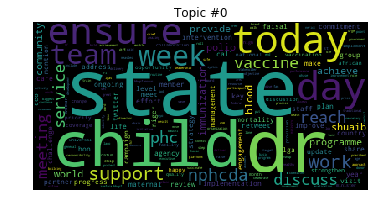

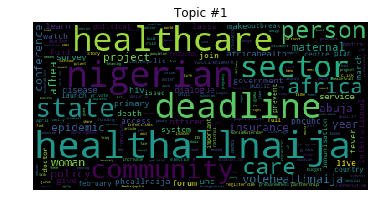

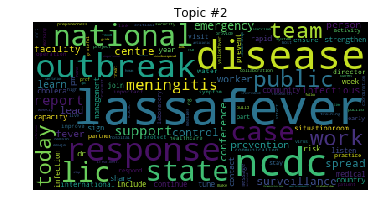

In [ ]:
for t in range(ldamallet.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamallet.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [ ]:
NCDCgov[NCDCgov.text.isnull()]

,ident,permalink,username,to,text,date,retweets,favorites,mentions,hashtags,geo


In [ ]:
NCDCgov.drop(201, inplace=True)